In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [178]:
df =  pd.read_csv('NFLX.csv')

In [179]:
df.shape

(251, 7)

In [180]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-05-01,329.440002,331.230011,318.089996,324.119995,324.119995,5341500
1,2023-05-02,325.000000,326.070007,315.619995,317.549988,317.549988,4318600
2,2023-05-03,317.549988,324.619995,315.850006,319.299988,319.299988,5064100
3,2023-05-04,319.010010,323.609985,317.950012,320.779999,320.779999,3879700
4,2023-05-05,323.609985,324.149994,319.440002,322.760010,322.760010,3988600


In [181]:
df.shape

(251, 7)

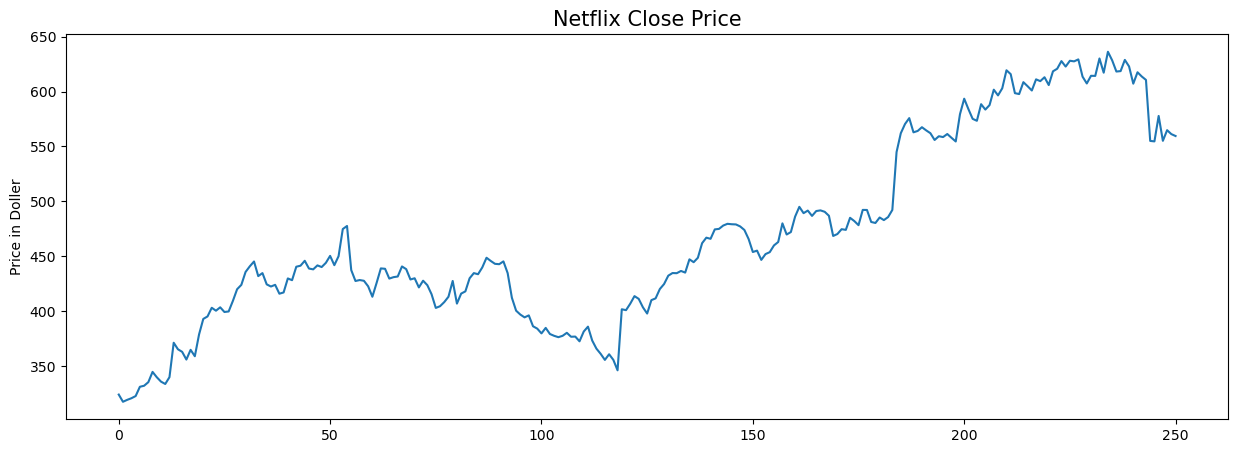

In [182]:
plt.figure(figsize=(15,5))
plt.plot(df['Close'])
plt.title('Netflix Close Price', fontsize=15)
plt.ylabel('Price in Doller')
plt.show()


In [183]:
df[df['Close'] == df['Adj Close']].shape

(251, 7)

In [184]:
df.drop(columns=['Adj Close'], inplace=True)

In [185]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

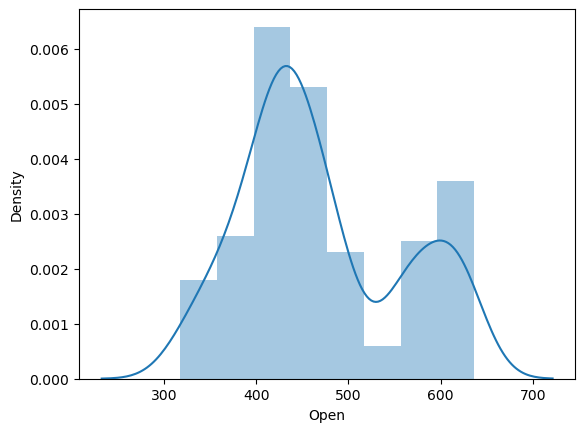

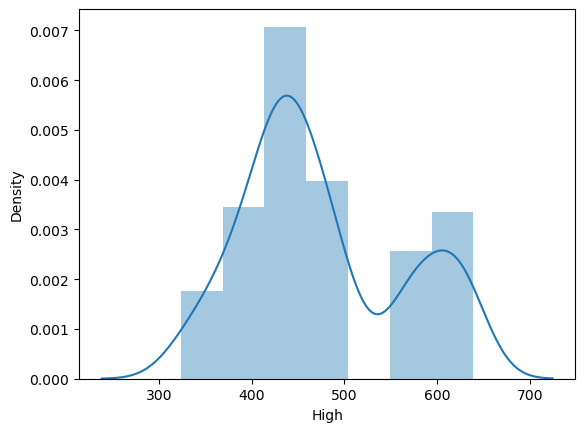

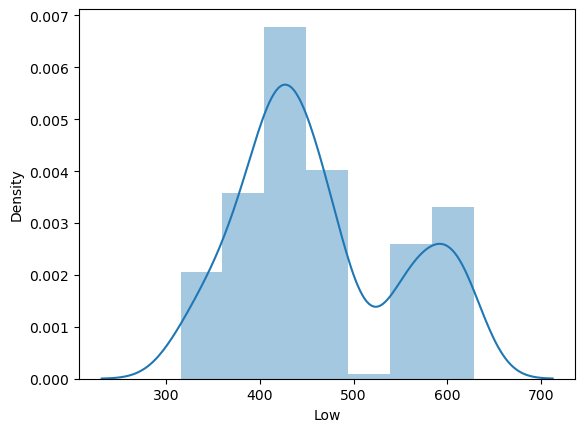

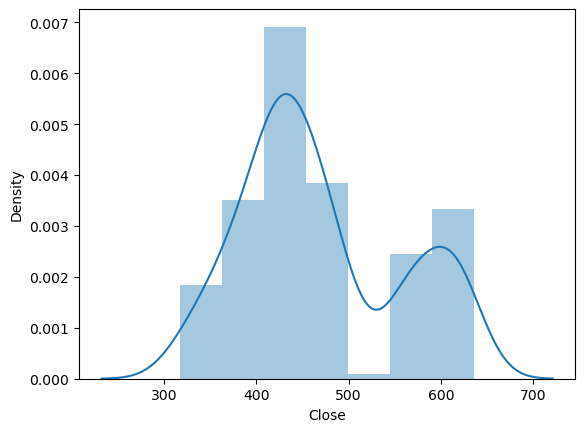

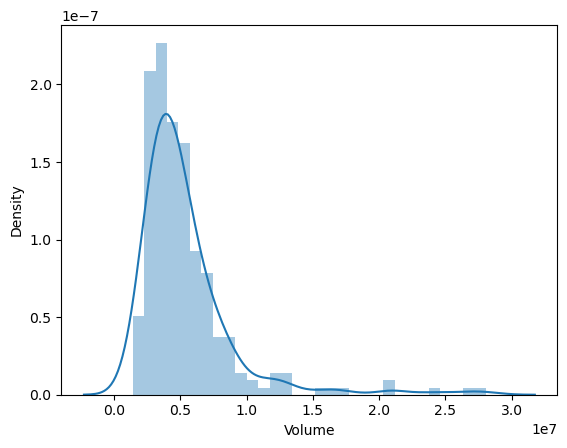

In [186]:
for i in df.columns[1:]:
    sns.distplot(df[i],)
    plt.show()

In [187]:
# Splitting the date column

splitted = df['Date'].str.split('-', expand=True)
# print(splitted)
df['day'] = splitted[2].astype('int')
df['month'] = splitted[1].astype('int')
df['year'] = splitted[0].astype('int')

In [188]:
df.drop(columns=['Date'], inplace=True)

In [189]:
df.head()

,Open,High,Low,Close,Volume,day,month,year
0,329.440002,331.230011,318.089996,324.119995,5341500,1,5,2023
1,325.000000,326.070007,315.619995,317.549988,4318600,2,5,2023
2,317.549988,324.619995,315.850006,319.299988,5064100,3,5,2023
3,319.010010,323.609985,317.950012,320.779999,3879700,4,5,2023
4,323.609985,324.149994,319.440002,322.760010,3988600,5,5,2023


In [190]:
# Create Quarter Column
df['is_quarter_end'] = np.where(df['month']%3==0, 1, 0)

df.sample(5)

,Open,High,Low,Close,Volume,day,month,year,is_quarter_end
140,466.950012,467.649994,462.760010,465.910004,2798500,17,11,2023,0
141,465.399994,476.760010,465.399994,474.470001,3617600,20,11,2023,0
29,418.829987,424.700012,416.570007,423.970001,5959500,12,6,2023,1
48,438.649994,440.799988,431.040009,440.209991,4574600,11,7,2023,0
249,558.210022,562.919983,553.190002,561.229980,4304500,26,4,2024,0


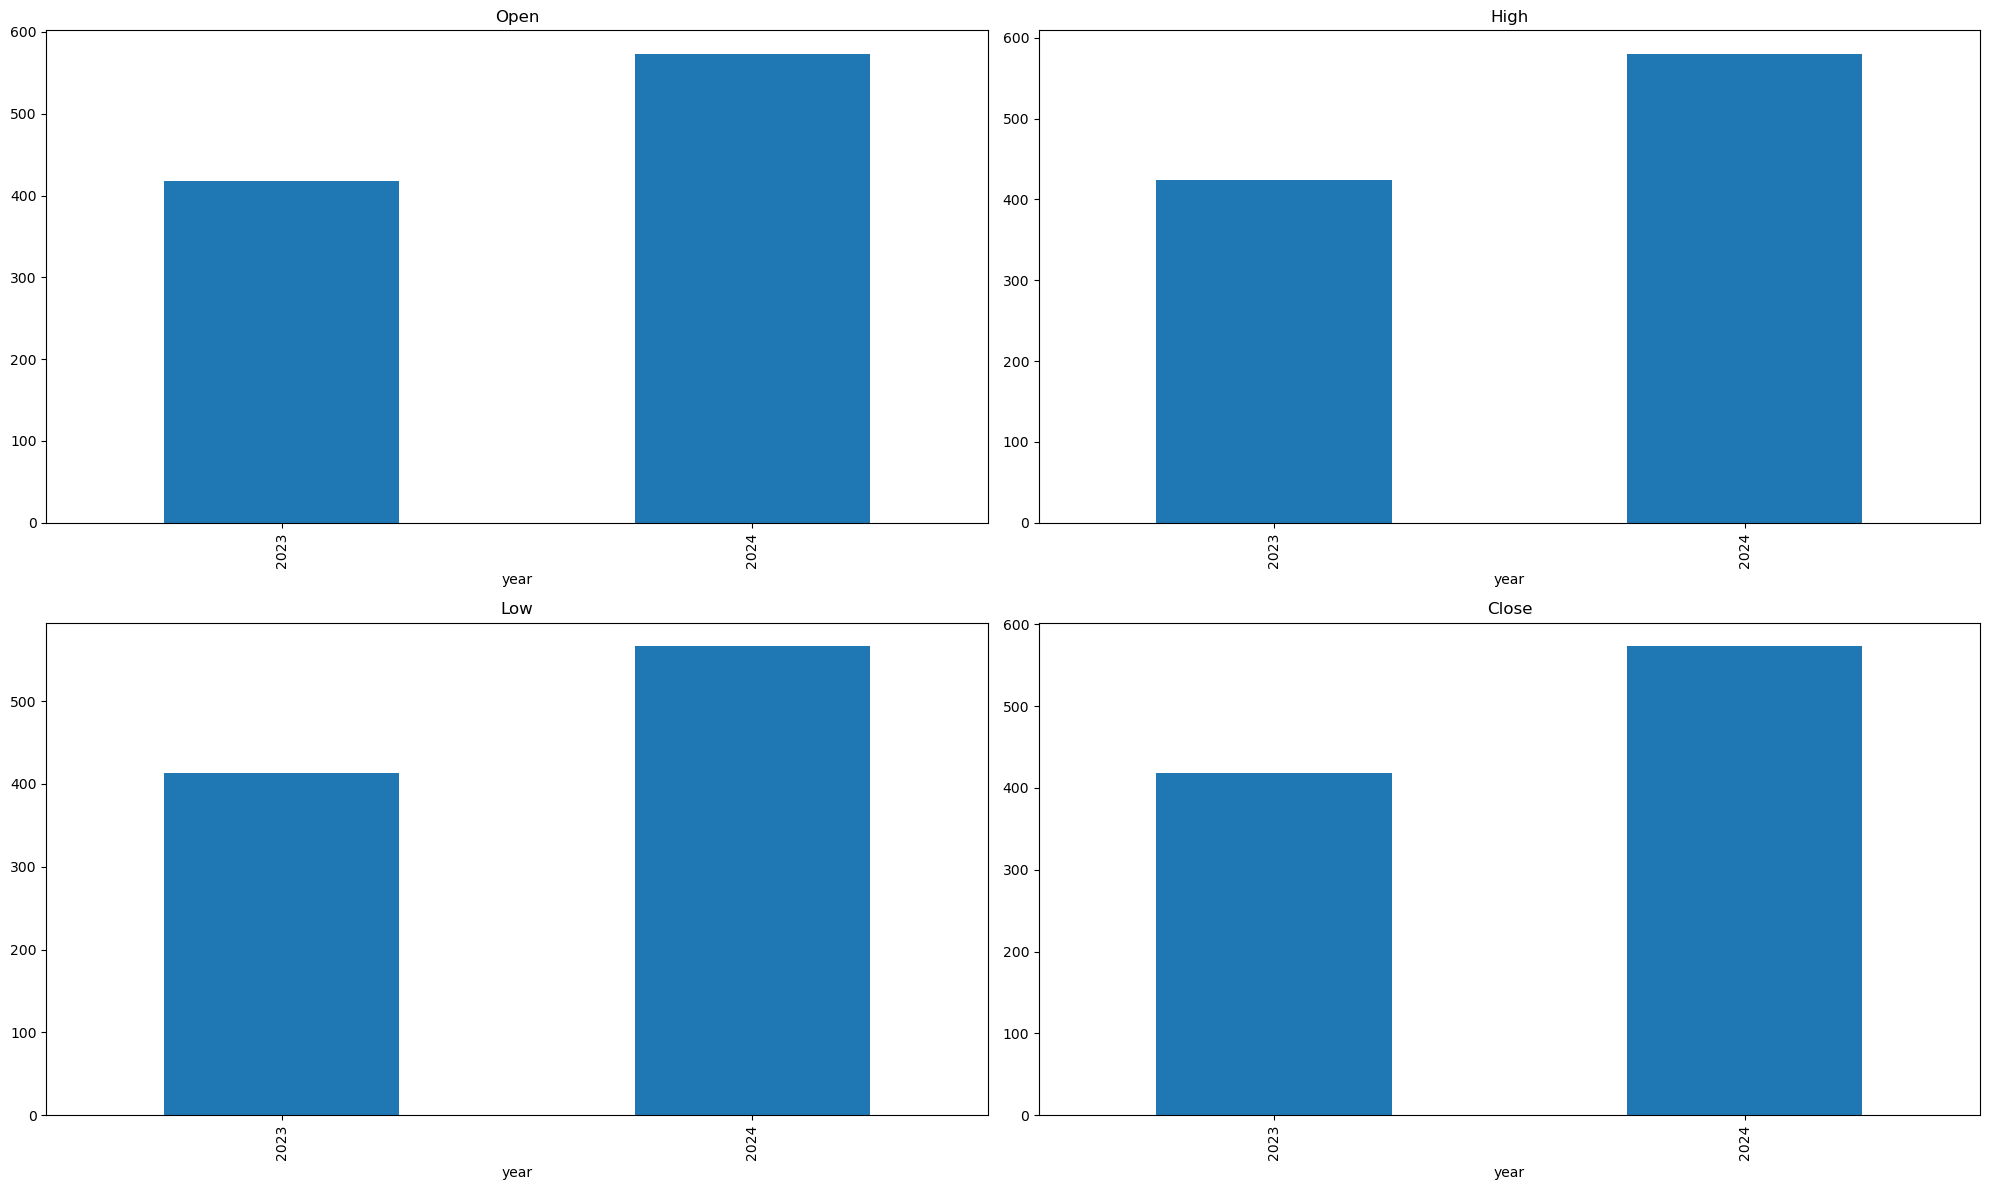

In [191]:
data_grouped = df.groupby('year').mean()
plt.subplots(figsize=(20,12))
 
for i, col in enumerate(['Open', 'High', 'Low', 'Close']):
  plt.subplot(2,2,i+1)
  data_grouped[col].plot.bar()
  plt.title(col)
  plt.tight_layout()
plt.show()

In [192]:
df.groupby('is_quarter_end').mean()

,Open,High,Low,Close,Volume,day,month,year
is_quarter_end,,,,,,,,
0,463.833234,470.040352,458.181353,464.370765,5.678711e+06,15.623529,6.058824,2023.364706
1,479.505433,485.024939,473.563706,478.498643,4.790881e+06,15.666667,7.481481,2023.246914


In [193]:
df['open-close']  = df['Open'] - df['Close']
df['low-high']  = df['Low'] - df['High']
df['target'] = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)

In [194]:
df.head()

,Open,High,Low,Close,Volume,day,month,year,is_quarter_end,open-close,low-high,target
0,329.440002,331.230011,318.089996,324.119995,5341500,1,5,2023,0,5.320007,-13.140015,0
1,325.000000,326.070007,315.619995,317.549988,4318600,2,5,2023,0,7.450012,-10.450012,1
2,317.549988,324.619995,315.850006,319.299988,5064100,3,5,2023,0,-1.750000,-8.769989,1
3,319.010010,323.609985,317.950012,320.779999,3879700,4,5,2023,0,-1.769989,-5.659973,1
4,323.609985,324.149994,319.440002,322.760010,3988600,5,5,2023,0,0.849975,-4.709992,1


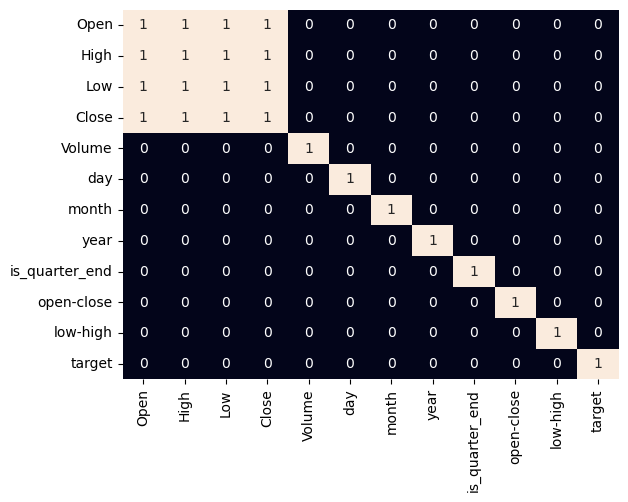

In [195]:
sns.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()

In [196]:
x = df[['open-close', 'low-high', 'is_quarter_end']]
y = df['target']

In [197]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x = scaler.fit_transform(x)

In [198]:
x

array([[ 7.05949463e-01, -2.79317874e-01, -6.90268490e-01],
       [ 9.86529374e-01,  2.53800578e-01, -6.90268490e-01],
       [-2.25363813e-01,  5.86756066e-01, -6.90268490e-01],
       [-2.27996911e-01,  1.20311483e+00, -6.90268490e-01],
       [ 1.17124000e-01,  1.39138689e+00, -6.90268490e-01],
       [-1.07763989e+00,  2.37948348e-01, -6.90268490e-01],
       [-1.88480419e-01,  1.02077584e+00, -6.90268490e-01],
       [-2.25065942e-02,  8.18635381e-01, -6.90268490e-01],
       [-1.28313429e+00, -3.76426580e-01, -6.90268490e-01],
       [ 6.46670575e-01,  1.82450779e-01, -6.90268490e-01],
       [ 6.28226771e-01,  1.06438289e+00, -6.90268490e-01],
       [ 3.80908841e-02,  1.67875188e+00, -6.90268490e-01],
       [-1.07500271e+00, -5.82147661e-03, -6.90268490e-01],
       [-3.16156759e+00, -3.52162276e+00, -6.90268490e-01],
       [ 5.97932115e-01,  1.10005482e+00, -6.90268490e-01],
       [ 3.14715023e-01,  4.40094947e-01, -6.90268490e-01],
       [ 5.65000278e-01,  3.70729179e-01

In [199]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train ,y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [200]:
x_train.shape

(200, 3)

In [201]:
x_test.shape

(51, 3)

In [202]:
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [203]:
models = [LogisticRegression(max_iter=200, random_state=42), SVC(
kernel='poly', probability=True), DecisionTreeClassifier(max_depth=6), ]

for i in range(3):
    models[i].fit(x_train, y_train)
    y_pred = models[i].predict(x_test)

    print(f'{models[i]} : ')
    print('Accuracy : ', accuracy_score(y_test, y_pred))
    print('Precision : ', precision_score(y_test, y_pred))
    print('Recall : ', recall_score(y_test, y_pred))
    print('F1 Score : ', f1_score(y_test, y_pred))
    print()

    
    
    
    
    
    
    
    # print('Training Accuracy : ', metrics.roc_auc_score(
    #     y_train, models[i].predict_proba(x_train)[:,1]))
    # print('Testing Accuracy : ', metrics.roc_auc_score(
    #     y_test, models[i].predict_proba(x_test)[:,1]))
    # print()


LogisticRegression(max_iter=200, random_state=42) : 
Accuracy :  0.6078431372549019
Precision :  0.5675675675675675
Recall :  0.84
F1 Score :  0.6774193548387096

SVC(kernel='poly', probability=True) : 
Accuracy :  0.49019607843137253
Precision :  0.4897959183673469
Recall :  0.96
F1 Score :  0.6486486486486487

DecisionTreeClassifier(max_depth=6) : 
Accuracy :  0.47058823529411764
Precision :  0.375
Recall :  0.12
F1 Score :  0.18181818181818182

